# Warp, Threshold, and Map to Rover-Centric Coordinates
![alt text](images/screen-shot-2017-05-02-at-2.28.19-pm.png)

To make a map of the environment, you're going to first apply a perspective transform and then apply a color threshold (or vice versa, doesn't really matter). This color thresholded image is now a map of the navigable terrain in front of the rover! Suppose you arrived at the thresholded binary image by combining the functions you wrote in (perception) and (perceptive)

In [28]:
import matplotlib.image as mpimg
import numpy as np


def perspect_transform(img, src, dst):
    # Get transform matrix using cv2.getPerspectivTransform()
    M = cv2.getPerspectiveTransform(src, dst)
    # Warp image using cv2.warpPerspective()
    # keep same size as input image
    warped = cv2.warpPerspective(img, M, (img.shape[1], img.shape[0]))
    # Return the result
    return warped


def color_thresh(img, rgb_thresh=(160, 160, 160)):
    # Create an array of zeros same xy size as img, but single channel
    color_select = np.zeros_like(img[:, :, 0])
    # Require that each pixel be above all thre threshold values in RGB
    # above_thresh will now contain a boolean array with "True"
    # where threshold was met
    above_thresh = (img[:, :, 0] > rgb_thresh[0]) \
                   & (img[:, :, 1] > rgb_thresh[1]) \
                   & (img[:, :, 2] > rgb_thresh[2])
    # Index the array of zeros with the boolean array and set to 1
    color_select[above_thresh] = 1
    # Return the binary image
    return color_select


image = mpimg.imread('images/sample.jpg')
# Define calibration box in source (actual) and destination (desired) coordinates
# These source and destination points are defined to warp the image
# to a grid where each 10x10 pixel square represents 1 square meter
dst_size = 5
# Set a bottom offset to account for the fact that the bottom of the image 
# is not the position of the rover but a bit in front of it
bottom_offset = 6
source = np.float32([[14, 140], [301, 140], [200, 96], [118, 96]])
destination = np.float32([[image.shape[1] / 2 - dst_size, image.shape[0] - bottom_offset],
                          [image.shape[1] / 2 + dst_size, image.shape[0] - bottom_offset],
                          [image.shape[1] / 2 + dst_size, image.shape[0] - 2 * dst_size - bottom_offset],
                          [image.shape[1] / 2 - dst_size, image.shape[0] - 2 * dst_size - bottom_offset],
                          ])

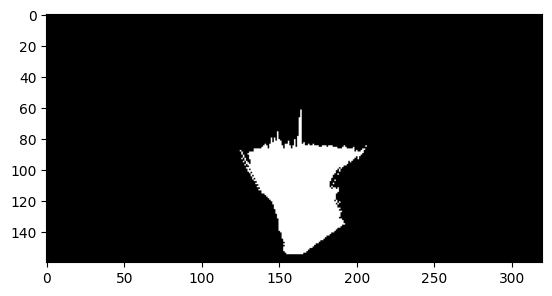

In [29]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# Uncomment the next line for use in a Jupyter notebook
#%matplotlib inline
import numpy as np

# Read in the same sample image as before
image = mpimg.imread('images/sample.jpg')

# Define calibration box in source (actual) and destination (desired) coordinates
# These source and destination points are defined to warp the image
# to a grid where each 10x10 pixel square represents 1 square meter
dst_size = 5
# Set a bottom offset to account for the fact that the bottom of the image 
# is not the position of the rover but a bit in front of it
bottom_offset = 6
source = np.float32([[14, 140], [301, 140], [200, 96], [118, 96]])
destination = np.float32([[image.shape[1] / 2 - dst_size, image.shape[0] - bottom_offset],
                          [image.shape[1] / 2 + dst_size, image.shape[0] - bottom_offset],
                          [image.shape[1] / 2 + dst_size, image.shape[0] - 2 * dst_size - bottom_offset],
                          [image.shape[1] / 2 - dst_size, image.shape[0] - 2 * dst_size - bottom_offset],
                          ])

# Assume you have already defined perspect_transform() and color_thresh()
warped = perspect_transform(image, source, destination)
colorsel = color_thresh(warped, rgb_thresh=(160, 160, 160))

# Plot the result
plt.imshow(colorsel, cmap='gray')
plt.show()


Which will give the following result:

![alt text](images/screen-shot-2017-04-13-at-12.53.47-pm.png)

You are now looking down on the rover's world from above and white indicates where you have identified navigable terrain in the view from the rover camera. The position of the rover camera in this image would be at roughly (x, y) = (160, 160).

# Converting to Rover-Centric Coordinates
The notion of a coordinate system that is fixed with respect to your robot is central to many robotics applications. Such a coordinate system allows you to describe the positions of things in the environment with respect to the robot, in this case, the rover (or more specifically, the rover's camera).

Your task in this next exercise is to extract the pixel positions of all navigable terrain (white) pixels and then transform those values to "rover-centric" coordinates, meaning a coordinate frame where the rover camera is at (x, y) = (0, 0).

You can quickly get the pixel positions in image space like this:

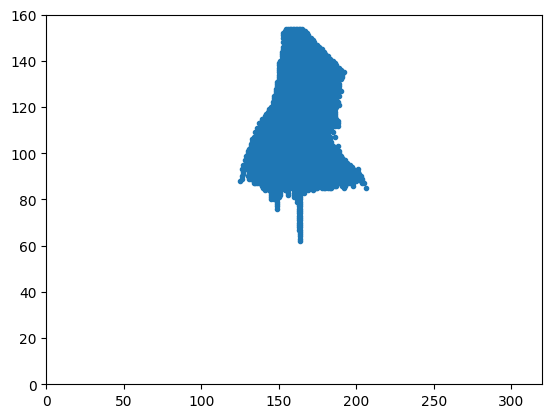

In [30]:
ypos, xpos = colorsel.nonzero()
plt.plot(xpos, ypos, '.')
plt.xlim(0, 320)
plt.ylim(0, 160)
plt.show()

Whoa! But it's upside-down! This is actually the same plot / image as before, we're just looking at it with the origin (0, 0) in the lower left, rather than the upper left, and the y-axis reversed.

Now you have x and y pixel positions in image space of the navigable terrain and all you need to do is convert it to rover-centric coordinates. However, you would also like to swap the x and y axes such that they're consistent with the world coordinate system that you'll eventually be mapping to. The image below shows both the rover-centric coordinate system we will define, and the world coordinate system, which is the reference frame that is fixed with respect to the world and that you will later be mapping to:

![alt text](images/screen-shot-2017-05-21-at-1.12.06-pm.png)

Write a function to take in a binary image, extract the x and y positions in image coordinates and then return x and y in rover coordinates.

In [31]:
def rover_coords(binary_img):
    # Extract xpos and ypos pixel positions from binary_img and
    # Convert xpos and ypos to rover-centric coordinates
    x_pixel = [0]
    y_pixel = [0]

    return x_pixel, y_pixel

![alt text](images/screen-shot-2017-04-30-at-7.13.43-pm.png)


This choice of coordinates might not seem very intuitive, but now when the rover is situated in the world at position $(x_{\text{world}}, y_{\text{world}}) = (0,0)$

*Check out the numpy.nonzero function to get the values from the image!*

In [32]:
# Define a function to convert from image coords to rover coords
def rover_coords(binary_img):
    # Identify nonzero pixels
    ypos, xpos = binary_img.nonzero()
    # Calculate pixel positions with reference to the rover position being at the 
    # center bottom of the image.  
    x_pixel = -(ypos - binary_img.shape[0]).astype(float)
    y_pixel = -(xpos - binary_img.shape[1] / 2).astype(float)
    return x_pixel, y_pixel

Text(0.5, 1.0, 'Rover-Centric Map')

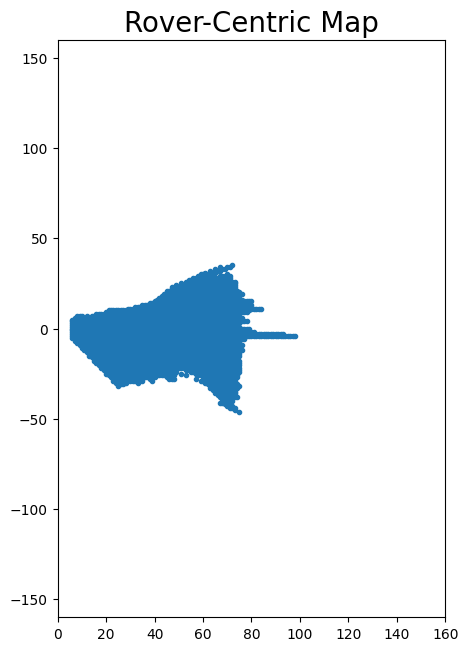

In [33]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

# Read in the sample image
image = mpimg.imread('images/sample.jpg')

# Perform warping and color thresholding
warped = perspect_transform(image, source, destination)
colorsel = color_thresh(warped, rgb_thresh=(160, 160, 160))
# Extract x and y positions of navigable terrain pixels
# and convert to rover coordinates
xpix, ypix = rover_coords(colorsel)

# Plot the map in rover-centric coords
fig = plt.figure(figsize=(5, 7.5))
plt.plot(xpix, ypix, '.')
plt.ylim(-160, 160)
plt.xlim(0, 160)
plt.title('Rover-Centric Map', fontsize=20)
#plt.show() # Uncomment if running on your local machine